In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [3]:
src = '/kaggle/input/datasets/nahidulislammiraz/dataset/brain_tumor_dataset'
dst = './brain_tumor_dataset'

if not os.path.isdir(dst): 
    shutil.copytree(src, dst)

    root_dir = './brain_tumor_dataset'
    num_of_img = {}
    
    for dir in os.listdir(root_dir):
        dir_path = os.path.join(root_dir, dir)
        if os.path.isdir(dir_path):
            num_of_img[dir] = len(os.listdir(dir_path))
num_of_img.items()

dict_items([('yes', 1500), ('no', 1500)])

In [4]:
def dataFolder(folder_name, percentage):
    # Define where the source images are (from your previous code)
    source_root = root_dir 
    destination_root = os.path.join(".", folder_name)
    
    if not os.path.exists(destination_root):
        os.makedirs(destination_root)
        
        for category in os.listdir(source_root):
            category_path = os.path.join(source_root, category)
            
            # Skip non-directories (like .DS_Store)
            if not os.path.isdir(category_path):
                continue

            # Create the category subfolder in the new destination
            os.makedirs(os.path.join(destination_root, category), exist_ok=True)

            # Get list of images, ignoring hidden system files
            images = [f for f in os.listdir(category_path) if not f.startswith('.')]
            
            # Calculate number of images to move
            # Note: num_of_img[category] works if that dict exists, 
            # but len(images) is safer if the folder content changed.
            num_to_move = max(0, math.floor(percentage * len(images)) - 5)

            if num_to_move > 0:
                selected_imgs = np.random.choice(images, size=num_to_move, replace=False)
                
                for img in selected_imgs:
                    src = os.path.join(category_path, img)
                    dst = os.path.join(destination_root, category, img)
                    shutil.move(src, dst)
        
        print(f"Done! Created '{folder_name}' with {int(percentage*100)}% of the data.")
    else:
        print(f"Error: The folder '{folder_name}' already exists.")

In [5]:
dataFolder("train",0.7)
dataFolder("val",0.15)
dataFolder("test",0.15)

Done! Created 'train' with 70% of the data.
Done! Created 'val' with 15% of the data.
Done! Created 'test' with 15% of the data.


In [6]:
print('brain_tumor_dataset/yes: ',len(os.listdir('./brain_tumor_dataset/yes')))
print('brain_tumor_dataset/no: ',len(os.listdir('./brain_tumor_dataset/no')))
print('----------------------')
print('train/yes: ',len(os.listdir('./train/yes')))
print('train/no: ',len(os.listdir('./train/no')))
print('----------------------')
print('test/yes: ',len(os.listdir('./test/yes')))
print('test/no: ',len(os.listdir('./test/no')))
print('----------------------')
print('val/yes: ',len(os.listdir('./val/yes')))
print('val/no: ',len(os.listdir('./val/no')))

brain_tumor_dataset/yes:  339
brain_tumor_dataset/no:  339
----------------------
train/yes:  1045
train/no:  1045
----------------------
test/yes:  53
test/no:  53
----------------------
val/yes:  63
val/no:  63


In [7]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array


2026-02-20 17:30:20.124615: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771608620.325448      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771608620.384645      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771608620.872322      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771608620.872402      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771608620.872406      55 computation_placer.cc:177] computation placer alr

In [8]:
model = Sequential()
#input layer:
model.add(Conv2D(filters = 16, kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

#Hidden Layers:
model.add(Conv2D(filters = 36, kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate = 0.25)) 

model.add(Flatten())
model.add(Dense(units=64, activation ="relu"))#not understand
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation="sigmoid"))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-20 17:30:55.338561: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = "adam", 
              loss = keras.losses.binary_crossentropy, 
              metrics = ['accuracy'])

In [10]:
def preprocessingImages1(path):
    image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1/255, horizontal_flip = True)
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = "binary")
    return image

In [11]:
path = "./train"
train_data = preprocessingImages1(path)

Found 2090 images belonging to 2 classes.


In [12]:
def preprocessingImages2(path):
    image_data = ImageDataGenerator(rescale = 1/255)
    image = image_data.flow_from_directory(directory = path, 
                                           target_size = (224,224), 
                                           batch_size = 32, 
                                           class_mode = "binary")
    return image

In [13]:
path = "./test"
test_data = preprocessingImages2(path)

path = "./val"
val_data = preprocessingImages2(path)

Found 106 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode='auto')
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose = 1, save_best_only = True, mode = 'auto')

cd = [es, mc]

In [15]:
hs = model.fit(train_data, 
               steps_per_epoch = 8, 
               epochs = 30, 
               verbose=1, 
               validation_data=val_data, 
               validation_steps=16, 
               callbacks=cd)

h = hs.history
h.keys()

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5310 - loss: 0.9731
Epoch 1: val_accuracy improved from -inf to 0.69841, saving model to ./bestmodel.h5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5384 - loss: 0.9590 - val_accuracy: 0.6984 - val_loss: 0.6248
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7071 - loss: 0.6086
Epoch 2: val_accuracy improved from 0.69841 to 0.73016, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.7080 - loss: 0.6057 - val_accuracy: 0.7302 - val_loss: 0.6440
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6605 - loss: 0.6566
Epoch 3: val_accuracy did not improve from 0.73016
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6639 - loss: 0.6532 - val_accuracy: 0.6349 - val_loss: 0.6208
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6553 - loss: 0.6511
Epoch 4: val_accuracy improved from 0.73016 to 0.74603, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6588 - loss: 0.6484 - val_accuracy: 0.7460 - val_loss: 0.5772
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7446 - loss: 0.5486
Epoch 5: val_accuracy did not improve from 0.74603
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7465 - loss: 0.5448 - val_accuracy: 0.7381 - val_loss: 0.7594
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7284 - loss: 0.6475
Epoch 6: val_accuracy improved from 0.74603 to 0.75397, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7292 - loss: 0.6417 - val_accuracy: 0.7540 - val_loss: 0.5379
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7286 - loss: 0.5590
Epoch 7: val_accuracy improved from 0.75397 to 0.76190, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7292 - loss: 0.5579 - val_accuracy: 0.7619 - val_loss: 0.5319
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6662 - loss: 0.5858
Epoch 8: val_accuracy improved from 0.76190 to 0.76984, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.6707 - loss: 0.5798 - val_accuracy: 0.7698 - val_loss: 0.5040
Epoch 9/30
2/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7812 - loss: 0.4436
Epoch 9: val_accuracy did not improve from 0.76984
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 759ms/step - accuracy: 0.7578 - loss: 0.4911 - val_accuracy: 0.7302 - val_loss: 0.5058
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7258 - loss: 0.5161
Epoch 10: val_accuracy did not improve from 0.76984
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7255 - loss: 0.5161 - val_accuracy: 0.7698 - val_loss: 0.5325
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7812 - loss: 0.5145
Epoch 11: val_accuracy improved from 0.76984 to 0.78571, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7764 - loss: 0.5185 - val_accuracy: 0.7857 - val_loss: 0.5350
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7467 - loss: 0.5037
Epoch 12: val_accuracy did not improve from 0.78571
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.7432 - loss: 0.5049 - val_accuracy: 0.7778 - val_loss: 0.4913
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7469 - loss: 0.5169
Epoch 13: val_accuracy did not improve from 0.78571
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7490 - loss: 0.5149 - val_accuracy: 0.7063 - val_loss: 0.4695
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7586 - loss: 0.5130
Epoch 14: val_accuracy did not improve from 0.78571
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7628 - loss: 0.5105 - val_accuracy: 0.7698 - val_loss: 0.4791
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6809 - loss: 0.6149
Epoch 15: val_accuracy improved from 0.78571 to 0.80159, saving 

8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6864 - loss: 0.6070 - val_accuracy: 0.8016 - val_loss: 0.4438
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8370 - loss: 0.4226
Epoch 16: val_accuracy did not improve from 0.80159
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8333 - loss: 0.4271 - val_accuracy: 0.7857 - val_loss: 0.4822
Epoch 17/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8181 - loss: 0.4602
Epoch 17: val_accuracy did not improve from 0.80159
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.8192 - loss: 0.4582 - val_accuracy: 0.7698 - val_loss: 0.4588
Epoch 18/30
2/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7969 - loss: 0.4169
Epoch 18: val_accuracy did not improve from 0.80159
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 737ms/step - accuracy: 0.7852 - loss: 0.4334 - val_accuracy: 0.7698 - val_loss: 0.4400
Epoch 19/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7972 - loss: 0.4195
Epoch 19: val_accuracy did not improve from 0.80159
8/8 ━━━━━

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

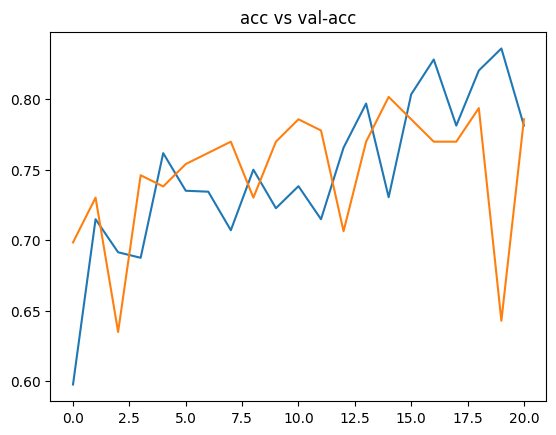

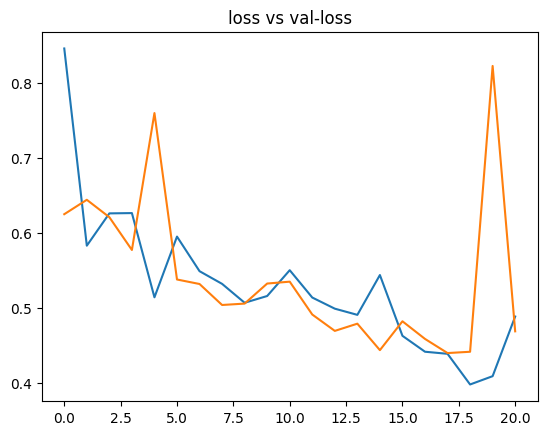

In [16]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

plt.title("acc vs val-acc")
plt.show()


plt.plot(h['loss'])
plt.plot(h['val_loss'])

plt.title("loss vs val-loss")
plt.show()

In [17]:
from tensorflow.keras.models import load_model
model = load_model("./bestmodel.h5")

In [18]:
acc = model.evaluate(test_data)[1] #evaluate: [0]->loss, [1]->accuracy
print(f"the accuracy of our model is {acc*100}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 566ms/step - accuracy: 0.7641 - loss: 0.4819
the accuracy of our model is 73.58490824699402%


Test image location test/yes/y1024.jpg


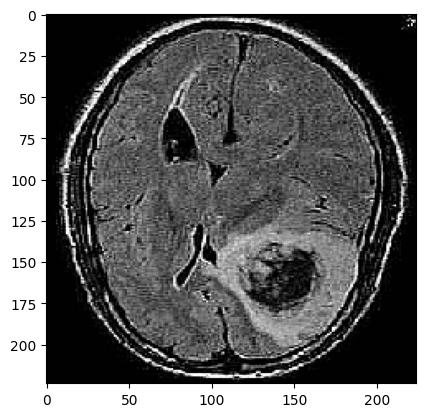

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
the image has a Tumor


In [21]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

test_img = input(str("Test image location"))
path = os.path.join('.',test_img)

img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr = np.expand_dims(input_arr, axis=0)

prediction = model.predict(input_arr) #output:[[0.98]]

pred = prediction[0][0] #[0]->go to the list, [0]->take first element of the list

if pred >= 0.5:
    print("the image has a Tumor")
else:
    print("the image does not have a Tumor")
